# House Price Prediction using Multiple Linear Regression

Import Required Libraries

In [3]:
# Libraries for data handling and calculations
import pandas as pd
import numpy as np

# Libraries for building and testing our model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Library for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set_style('whitegrid')

print("All libraries loaded successfully!")

All libraries loaded successfully!


Load the Dataset

In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('House.csv')

# Display basic information about the dataset
print(f"Dataset has {df.shape[0]} houses and {df.shape[1]} columns")
print("\nFirst 5 rows of data:")
df.head()

Dataset has 4600 houses and 18 columns

First 5 rows of data:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Explore the Data

In [5]:
# Show information about each column
print("Dataset Information:")
print(df.info())

print("\n" + "="*50)
print("Statistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the distribution of the target variable (price)
print("\nPrice Statistics:")
print(f"Average Price: ${df['price'].mean():,.2f}")
print(f"Median Price: ${df['price'].median():,.2f}")
print(f"Minimum Price: ${df['price'].min():,.2f}")
print(f"Maximum Price: ${df['price'].max():,.2f}")

Missing values in each column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Price Statistics:
Average Price: $551,962.99
Median Price: $460,943.46
Minimum Price: $0.00
Maximum Price: $26,590,000.00


Feature Engineering

In [7]:
# Make a copy of the dataframe to work with
df_processed = df.copy()

# Convert date column to datetime format
df_processed['date'] = pd.to_datetime(df_processed['date'])
df_processed['sale_year'] = df_processed['date'].dt.year

# Feature 1: House Age (how old is the house when it was sold)
df_processed['house_age'] = df_processed['sale_year'] - df_processed['yr_built']

# Feature 2: Was the house renovated? (Binary: Yes=1, No=0)
df_processed['is_renovated'] = (df_processed['yr_renovated'] > 0).astype(int)

# Feature 3: Years since renovation (if renovated, else use house age)
df_processed['years_since_renovation'] = df_processed.apply(
    lambda row: row['sale_year'] - row['yr_renovated'] if row['yr_renovated'] > 0
    else row['house_age'], axis=1
)

# Feature 4: Total rooms (bedrooms + bathrooms)
df_processed['total_rooms'] = df_processed['bedrooms'] + df_processed['bathrooms']

# Feature 5: Price per square foot (only for reference, not a feature for prediction)
df_processed['price_per_sqft'] = df_processed['price'] / df_processed['sqft_living']

# Feature 6: Basement ratio (what portion of the house is basement)
df_processed['basement_ratio'] = df_processed['sqft_basement'] / df_processed['sqft_living']

# Feature 7: Has basement? (Binary: Yes=1, No=0)
df_processed['has_basement'] = (df_processed['sqft_basement'] > 0).astype(int)

# Feature 8: Lot size to living area ratio
df_processed['lot_to_living_ratio'] = df_processed['sqft_lot'] / df_processed['sqft_living']

print("Feature engineering completed!")
print(f"\nNew features created: {['house_age', 'is_renovated', 'years_since_renovation', 'total_rooms', 'basement_ratio', 'has_basement', 'lot_to_living_ratio']}")
print(f"\nTotal columns now: {df_processed.shape[1]}")

# Show the new features
print("\nSample of engineered features:")
df_processed[['price', 'house_age', 'is_renovated', 'total_rooms', 'basement_ratio', 'has_basement']].head()

Feature engineering completed!

New features created: ['house_age', 'is_renovated', 'years_since_renovation', 'total_rooms', 'basement_ratio', 'has_basement', 'lot_to_living_ratio']

Total columns now: 27

Sample of engineered features:


,price,house_age,is_renovated,total_rooms,basement_ratio,has_basement
0,313000.0,59,1,4.50,0.000000,0
1,2384000.0,93,0,7.50,0.076712,1
2,342000.0,48,0,5.00,0.000000,0
3,420000.0,51,0,5.25,0.500000,1
4,550000.0,38,1,6.50,0.412371,1


Select Features for Modeling

In [8]:
# Select the features we want to use for prediction
# We exclude text columns and the target variable (price)
feature_columns = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
    'house_age', 'is_renovated', 'years_since_renovation', 'total_rooms',
    'basement_ratio', 'has_basement', 'lot_to_living_ratio'
]

# X contains our features (input variables)
X = df_processed[feature_columns]

# y contains our target (what we want to predict: price)
y = df_processed['price']

print(f"Number of features selected: {len(feature_columns)}")
print(f"\nFeatures being used:\n{feature_columns}")
print(f"\nDataset shape: {X.shape[0]} houses, {X.shape[1]} features")

Number of features selected: 17

Features being used:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'house_age', 'is_renovated', 'years_since_renovation', 'total_rooms', 'basement_ratio', 'has_basement', 'lot_to_living_ratio']

Dataset shape: 4600 houses, 17 features


Handle Any Remaining Issues

In [9]:
# Check for infinite values
print("Checking for infinite values...")
infinite_mask = np.isinf(X).any(axis=1)
print(f"Rows with infinite values: {infinite_mask.sum()}")

# Replace infinite values with NaN, then fill with median
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Check for missing values in features
print(f"\nMissing values in features after cleaning: {X.isnull().sum().sum()}")

# Remove any rows where price is missing or zero
valid_mask = (y > 0) & (~y.isnull())
X = X[valid_mask]
y = y[valid_mask]

print(f"\nFinal dataset size: {X.shape[0]} houses")

Checking for infinite values...
Rows with infinite values: 0

Missing values in features after cleaning: 0

Final dataset size: 4551 houses


Split Data into Training and Testing Sets

In [10]:
# Split the data: 80% for training, 20% for testing
# random_state=42 ensures we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} houses")
print(f"Testing set: {X_test.shape[0]} houses")
print(f"\nFeatures in model: {X_train.shape[1]}")

Training set: 3640 houses
Testing set: 911 houses

Features in model: 17


Feature Scaling

In [11]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on training data and transform it
# "Fit" means the scaler learns the mean and std from training data
# "Transform" means it applies the scaling
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
# Important: We only "fit" on training data, then "transform" test data
# This prevents data leakage
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nBefore scaling - Sample values from training set:")
print(X_train.iloc[0].head())

print(f"\nAfter scaling - Same values:")
print(pd.Series(X_train_scaled[0], index=X_train.columns).head())

print("\nNotice how values are now centered around 0 with similar scales!")

Feature scaling completed!

Before scaling - Sample values from training set:
bedrooms          4.00
bathrooms         1.75
sqft_living    1360.00
sqft_lot       4840.00
floors            1.50
Name: 4134, dtype: float64

After scaling - Same values:
bedrooms       0.682897
bathrooms     -0.519969
sqft_living   -0.817108
sqft_lot      -0.269178
floors        -0.021820
dtype: float64

Notice how values are now centered around 0 with similar scales!


 Train the Multiple Linear Regression Model

**Formula:** Price = (coefficient₁ × feature₁) + (coefficient₂ × feature₂) + ... + intercept

In [12]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model using our scaled training data
print("Training the model...")
model.fit(X_train_scaled, y_train)

print("✓ Model training completed!")
print(f"\nModel intercept (base price): ${model.intercept_:,.2f}")

Training the model...
✓ Model training completed!

Model intercept (base price): $558,258.51


View Feature Importance

In [13]:
# Create a dataframe of feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
})

# Sort by absolute value to see most influential features
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (sorted by absolute impact):")
print("\nPositive coefficient = increases price")
print("Negative coefficient = decreases price\n")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))

Feature Importance (sorted by absolute impact):

Positive coefficient = increases price
Negative coefficient = decreases price

               Feature    Coefficient
           sqft_living  134252.413292
        basement_ratio -132933.828559
            sqft_above  100452.159065
         sqft_basement   89756.884470
             house_age   80549.719567
          has_basement   77974.248364
             bathrooms   53000.028342
              bedrooms  -47654.589849
              sqft_lot  -43558.387501
             condition   34734.370866
                  view   34234.504879
            waterfront   32816.731523
   lot_to_living_ratio   21033.515241
years_since_renovation  -17376.801614
                floors    8597.249493
           total_rooms   -1751.966558
          is_renovated   -1535.726691


Make Predictions

In [14]:
# Make predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Make predictions on test data
y_test_pred = model.predict(X_test_scaled)

print("Predictions completed!")
print(f"\nSample predictions vs actual prices (first 5 houses in test set):")

# Create a comparison dataframe
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_test_pred[:5],
    'Difference': y_test.values[:5] - y_test_pred[:5]
})

print(comparison.to_string(index=False))

Predictions completed!

Sample predictions vs actual prices (first 5 houses in test set):
 Actual Price  Predicted Price     Difference
    1225000.0     1.423316e+06 -198315.717058
     496752.0     5.164530e+05  -19700.993014
     612500.0     6.403632e+05  -27863.222864
     265000.0     3.035484e+05  -38548.362315
     615000.0     6.147116e+05     288.404118


Evaluate Model Performance

In [15]:
# Calculate metrics for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Calculate metrics for test data
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Display results
print("="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

print("\n📊 TRAINING SET PERFORMANCE:")
print(f"  R² Score: {train_r2:.4f} ({train_r2*100:.2f}% of variance explained)")
print(f"  MAE: ${train_mae:,.2f}")
print(f"  RMSE: ${train_rmse:,.2f}")
print(f"  MAPE: {train_mape:.2f}%")

print("\n📈 TEST SET PERFORMANCE:")
print(f"  R² Score: {test_r2:.4f} ({test_r2*100:.2f}% of variance explained)")
print(f"  MAE: ${test_mae:,.2f}")
print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAPE: {test_mape:.2f}%")

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)

if test_r2 >= 0.8:
    print("✓ Excellent model! R² score above 0.8")
elif test_r2 >= 0.6:
    print("✓ Good model! R² score between 0.6 and 0.8")
else:
    print("⚠ Model needs improvement. R² score below 0.6")

print(f"\nOn average, predictions are off by ${test_mae:,.2f} (MAE)")
print(f"That's an average error of {test_mape:.1f}%")

# Check for overfitting
if abs(train_r2 - test_r2) > 0.1:
    print("\n⚠ Warning: Large difference between training and test R² suggests overfitting")
else:
    print("\n✓ Good! Training and test performance are similar (no major overfitting)")

MODEL PERFORMANCE EVALUATION

📊 TRAINING SET PERFORMANCE:
  R² Score: 0.2031 (20.31% of variance explained)
  MAE: $164,021.54
  RMSE: $535,829.53
  MAPE: 33.76%

📈 TEST SET PERFORMANCE:
  R² Score: 0.6066 (60.66% of variance explained)
  MAE: $159,575.29
  RMSE: $241,936.89
  MAPE: 34.49%

INTERPRETATION:
✓ Good model! R² score between 0.6 and 0.8

On average, predictions are off by $159,575.29 (MAE)
That's an average error of 34.5%

⚠ Warning: Large difference between training and test R² suggests overfitting



Visualize Results

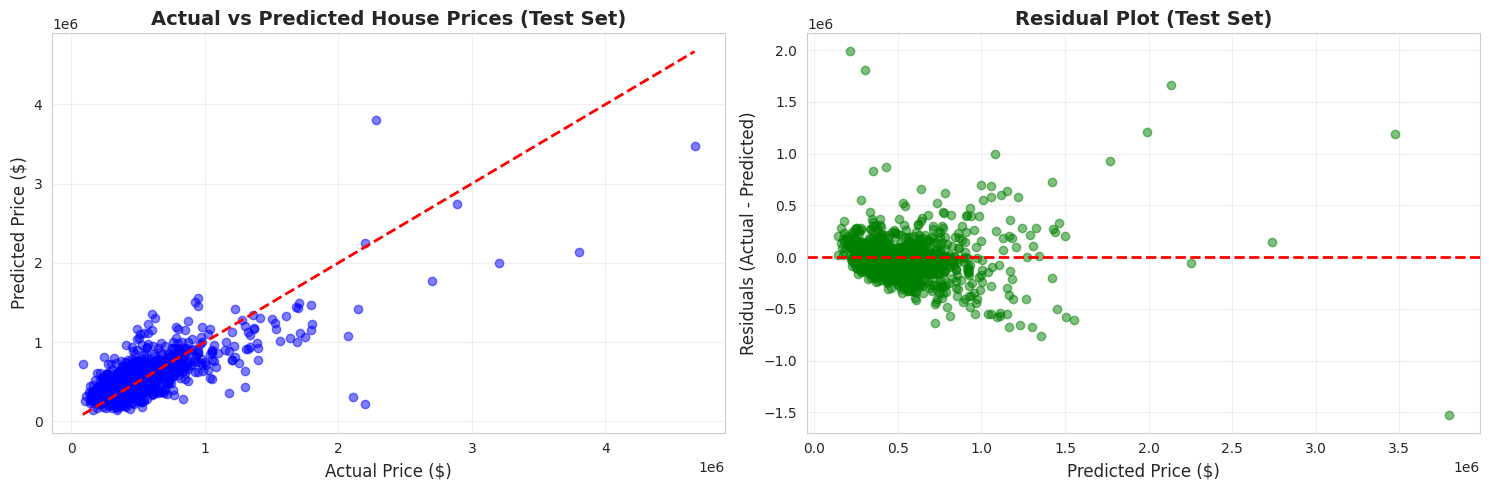


📊 What these plots show:

Left plot: Points close to the red line mean accurate predictions
Right plot: Points close to zero line mean small errors


In [16]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Actual vs Predicted (Test Set)
axes[0].scatter(y_test, y_test_pred, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title('Actual vs Predicted House Prices (Test Set)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals (Errors)
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Residual Plot (Test Set)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 What these plots show:")
print("\nLeft plot: Points close to the red line mean accurate predictions")
print("Right plot: Points close to zero line mean small errors")

Making Predictions on New Data


In [17]:
# Example: Create a new house with specific features
new_house = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2.5],
    'sqft_living': [2000],
    'sqft_lot': [8000],
    'floors': [2.0],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'sqft_above': [1500],
    'sqft_basement': [500],
    'house_age': [20],
    'is_renovated': [1],
    'years_since_renovation': [5],
    'total_rooms': [5.5],
    'basement_ratio': [0.25],
    'has_basement': [1],
    'lot_to_living_ratio': [4.0]
})

# Scale the new house features
new_house_scaled = scaler.transform(new_house)

# Predict the price
predicted_price = model.predict(new_house_scaled)[0]

print("\n🏠 NEW HOUSE SPECIFICATIONS:")
print("="*50)
for col in new_house.columns:
    print(f"  {col}: {new_house[col].values[0]}")

print("\n💰 PREDICTED PRICE:")
print("="*50)
print(f"  ${predicted_price:,.2f}")
print("\nNote: This is an estimate based on the model's learning from historical data")


🏠 NEW HOUSE SPECIFICATIONS:
  bedrooms: 3
  bathrooms: 2.5
  sqft_living: 2000
  sqft_lot: 8000
  floors: 2.0
  waterfront: 0
  view: 0
  condition: 4
  sqft_above: 1500
  sqft_basement: 500
  house_age: 20
  is_renovated: 1
  years_since_renovation: 5
  total_rooms: 5.5
  basement_ratio: 0.25
  has_basement: 1
  lot_to_living_ratio: 4.0

💰 PREDICTED PRICE:
  $566,439.80

Note: This is an estimate based on the model's learning from historical data
